In [ ]:
#Using the same Similarity score kernel (e.g. 1a_cosine_similarity.ipynb) 

In [12]:
print('MS dataset: ', MSrawdata)
print('Cosine tolerance: ', cosine_tolerance)
print('Similarity cut-off: ', cutoff)
print('Maxmimum edges per node: ', links)

MS dataset:  MassBank_NIST_Feb20
Cosine tolerance:  0.1
Similarity cut-off:  0.6
Maxmimum edges per node:  10


In [13]:
data_path_net = '../data/processed/MolecularNetwork/'

In [14]:
import networkx as nx
import matchmsextras.networking as net
from matchms.networking import SimilarityNetwork
network = SimilarityNetwork(identifier_key="inchikey",
                               score_cutoff=cutoff,
                               max_links=links,
                              keep_unconnected_nodes=False)
network.create_network(scores,  score_name="CosineGreedy_score")
network = network.graph

In [15]:
nx.write_graphml(network, data_path_net + MSrawdata+"_tol"+str(cosine_tolerance)+"_cutoff"+str(cutoff)+"_links"+str(links)+".graphml")

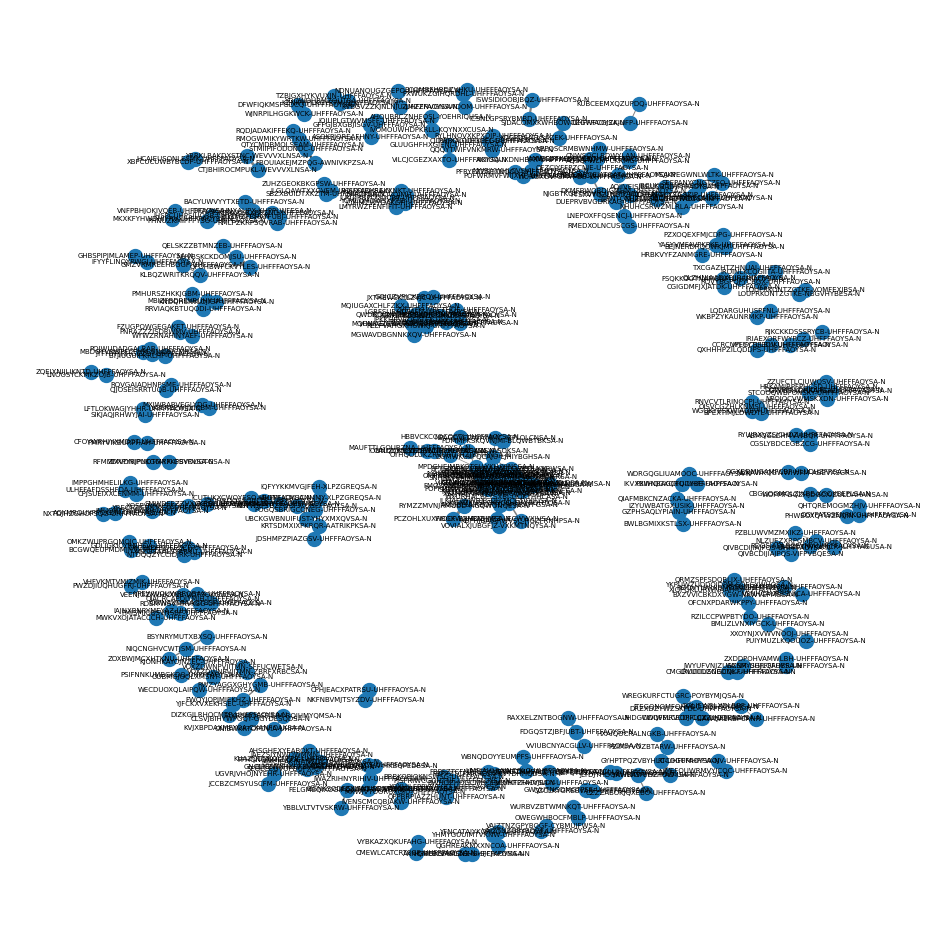

In [16]:
net.plot_cluster(network)

Nodes MB Mass spectra

In [ ]:
from matchms.importing import load_from_msp
from matchms.exporting import save_as_msp

data_path_ms = '../data/processed/MS2MassBank/'
nodes=list(network.nodes())

MB_spectrums = list(load_from_msp(data_path_ms+ MSrawdata+"_transformed.msp"))
spectrums_net=[s for s in MB_spectrums if s.get('inchikey') in nodes]

save_as_msp(spectrums_net, data_path_ms + MSrawdata + '_net.msp')